# Analisis Exploratorio


Leemos la data y exploramos los campos

## Tipo de cada una de las variables de dataset

### Categorica Nominal

* **pc_peor_estado_act_cta_aho** (Peor estado cuenta ahorro)
* **cluster_recod** (segmento cluster)
* **pc_ingreso_rutina_con_techo** (Ingreso por rutina una vez aplicada los techos por segmento)
* **cp_esta_cuota_otro** (Es el estado de la cuota otro)
* **banca_completa** (Si el cliente pertenece al segmento banca completa o no)
* **segmentoestructural** (Segmento estructural)
* **subsegmentoestructural** (Sub segmento estructural)

### Cuantitiva Continua 
* **desv_sem** (desviación estándar del máximo de moras en el semestre anterior)
* **prom_bim** (promedio del máximo de moras en el bimestre anterior)
* **prom_mes_anterior** (Promedio de los dias de mora en el mes anterior)
* **prom_sem** (promedio del máximo de moras en el semestre anterior)
* **prom_trim** (promedio del máximo de moras en el trimestre anterior)
* **desv_trim** (desviación estándar del máximo de moras en el trimestre anterior)
* **desv_bim** (desviación estándar del máximo días de mora en el bimestre anterior)
* **dh_avg_dia_retiros_d** (Día promedio del mes en el que realiza los retiros)
* **cpc_avg_proc_deuda** (Promedio del porcentaje de las deudas de un cliente en el mes anterior)
* **pc_saldo_prom3_tdc_entidad** (Saldo promedio de los últimos 3 meses de tarjeta de crédito en el banco)
* **dh_avg_dia_entradas** (Día promedio del mes en el que recibe las entradas de dinero)
* **dh_avg_dia_pagos_d** (Día del mes promedio en el que hace las salidas de dinero por pagos)
* **cpc_avg_nro_cuota** (Promedio del número de cuotas entre todos los productos del cliente)
* **gsm_prom_dias_gest** (Promedio de los días en que se realizaron gestiones en el mes anterior)
* **cpc_avg_saldo** (Promedio del saldo de las obligaciones del cliente en el mes anterior)
* **dh_avg_dia_salidas** (Día promedio del mes en el que hace las salidas de dinero)

### Cuantitativa discreta
* **max_trim** (máximo días de mora en el trimestre anterior)
* **max_sem** (máximo días de mora en el semestre anterior)
* **max_mes_anterior** (días de mora máximo en el mes anterior)
* **cpc_max_nro_cuota** (Máximo número de cuotas entre todos los productos del cliente en el mes anterior)
* **cpc_min_nro_cuota** (Mínimo número de cuotas entre todos los productos del cliente en el mes anterior)
* **nro_gestiones** (Numero de gestiones realizadas)

### No clasificada
* otros (variables que no se clasificaron fácilmente en las categorías anteriores debido a la falta de información específica en sus descripciones)

## REPLICACION DE TODO LO ANALISDAO EN R (BAC.qmd)

In [47]:
import pandas as pd

# Load the data
data = pd.read_csv('./Base_entrenamiento.csv')

# Checking the percentage of missing values per column
missing_values_percentage = data.isnull().mean() * 100

# Dropping rows with missing values as they represent a minor percentage (0.8% as stated in the R script)
data_cleaned = data.dropna()

# Summary statistics for the cleaned data
summary = data_cleaned.describe()

# The percentage of missing values for each column and summary statistics for the cleaned data
missing_values_percentage, summary


(max_trim                  2.60406
 max_sem                   2.60406
 desv_sem                  2.60406
 prom_bim                  2.60406
 max_mes_anterior          2.60406
                            ...   
 y_auto_cura               2.60406
 llave                     2.60406
 segmentoestructural       2.60406
 subsegmentoestructural    2.60406
 anhomes_ciclo             2.60406
 Length: 124, dtype: float64,
            max_trim       max_sem      desv_sem      prom_bim  \
 count  19000.000000  19000.000000  19000.000000  19000.000000   
 mean      12.906632     16.458421      6.491201      7.647026   
 std       19.649958     22.764764      8.190587     15.131511   
 min        0.000000      0.000000      0.000000      0.000000   
 25%        0.000000      3.000000      1.224745      0.000000   
 50%        7.000000     10.000000      4.183300      3.000000   
 75%       17.000000     23.000000      9.000000      9.000000   
 max      696.000000   1062.000000    210.552052    681.5

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical factors using Label Encoding
categorical_vars = [
'mejor_gestion', 
'pc_cant_moras_30_ult_12_meses',
'nro_gestiones',
'pc_cant_moras_30_ult_3_meses', 
'pc_tiem_1er_prod_abierto_total',
'pc_cant_moras_60_ult_12_meses', 
'gestiones_eficaces', 
'dh_max_dia_entradas',
'pc_cupo_entidad',
'pc_cant_moras_90_ult_12_meses',
'dh_max_dia_salidas', 
'pc_cant_moras_60_ult_3_meses', 
'cp_inicial_menos_saldo', 
'pc_peor_estado_act_cta_aho',
'dia_pago','cp_cuotas_falta', 
'pcons_tarjeta_de_credito', 
'gestiones_prod',
'pcons_vehiculos_sufi',
'cluster_recod',
'dh_cant_otros_d',
'pc_cont_30_lt_12m_tot_sf',
'pc_cant_mora90_ult_12m_total', 
'dh_cant_pagos_d', 
'dc_porc_prod_sin_mora',
'dh_min_dia_pagos_d', 
'dh_min_dia_pago_tarj_d',
'cp_nro_cuota',
'cp_valor_inicial', 
'dh_max_dia_otros_d', 
'cp_cuota_sobre_saldo',
'dh_cant_pago_tarj_d',
'dh_max_dia_pagos_d', 
'cp_saldo_sobre_inicial',
'cp_esta_cuota_otro',
'dh_max_dia_retiros_d',
'dh_min_dia_tras_d', 
'cp_porc_valorcuot_ing',
'pc_tiem_lt_prod_abie_total',
'marca_info_cifin_decode',
'dh_max_dia_pago_tarj_d', 
'pc_cantidad_tdc_entidad',
'dh_min_dia_otros_d',
'dc_cant_obligaciones',
'cp_saldo', 
'cp_cuota_sobre_inicial',
'cp_porc_saldo_ing',
'gsm_mejor_gestion',
'dh_min_dia_nomina_c', 
'dh_max_dia_nomina_c',
'cp_valor_cuota',
'gsm_prom_dias_gest',
'pc_cuota_no_rot_ent',
'banca_completa',
'dh_min_dia_pago_cred_d',
'dh_cant_tras_d',
'dh_max_dia_comisio_d',
'pc_productos_no_rotativos_entidad', 
'pc_vi_no_rotativos_entidad',
'dh_min_dia_entradas',
'pcons_hipotecario_vivienda',
'gsm_mejor_gestion_3m', 
'y_auto_cura',
'anhomes_ciclo',
'subsegmentoestructural',
'segmentoestructural'
]

label_encoders = {}
for var in categorical_vars:
    le = LabelEncoder()
    data_cleaned[var] = le.fit_transform(data_cleaned[var])
    label_encoders[var] = le

# Identify numerical columns (excluding the categorical ones)
numerical_cols = data_cleaned.columns.difference(categorical_vars)

# Standardize the numerical features
scaler = StandardScaler()
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

# Apply PCA
pca = PCA()
pca.fit(data_cleaned[numerical_cols])
pca_data = pca.transform(data_cleaned[numerical_cols])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()

# Find the number of components that explain at least 80% of the variance
components_variance = (cumulative_explained_variance < 0.8).sum() + 1

# Reduce the dataset dimensions with PCA to the number of components found
pca = PCA(n_components=components_variance)
data_reduced = pca.fit_transform(data_cleaned[numerical_cols])

# Show the number of components and their explained variance
components_variance, cumulative_explained_variance, explained_variance[:components_variance]


C:\Users\angel\AppData\Local\Temp\ipykernel_37268\674084888.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[var] = le.fit_transform(data_cleaned[var])
C:\Users\angel\AppData\Local\Temp\ipykernel_37268\674084888.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[var] = le.fit_transform(data_cleaned[var])
C:\Users\angel\AppData\Local\Temp\ipykernel_37268\674084888.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

(13,
 array([0.17853879, 0.31949566, 0.41463156, 0.50917033, 0.56825013,
        0.61343482, 0.65026386, 0.68421102, 0.71747939, 0.74396384,
        0.76796714, 0.79150571, 0.81244417, 0.82987325, 0.84671791,
        0.86292503, 0.87457865, 0.88576979, 0.89659395, 0.90710943,
        0.9170845 , 0.92661067, 0.93478713, 0.94183308, 0.94752361,
        0.95249916, 0.95742555, 0.96196104, 0.96636847, 0.97041864,
        0.97436884, 0.9777806 , 0.98110563, 0.98436697, 0.98705796,
        0.989567  , 0.99148976, 0.99320184, 0.99469683, 0.99579976,
        0.99658948, 0.99734586, 0.99806453, 0.99854203, 0.99889822,
        0.9992461 , 0.99955332, 0.99975576, 0.99991803, 0.9999697 ,
        0.99998537, 0.99999233, 0.99999774, 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 array([0.17853879, 0.14095687, 0.0951359 , 0.09453877, 0.05907981,
        0.04518469, 0.03682904, 0.03394716, 0.03326837, 0.02648444,
        0.02400331, 0.02353857, 0.02093846]))

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import torch.nn as nn
import torch

# Prepare the dataset for training
# Target variable


y = data_cleaned['y_auto_cura']
# Features (excluding the target variable)
X = data_cleaned.drop('y_auto_cura', axis=1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the Random Forest Classifier
rf_clf.fit(X_train, y_train)
# Predictions
rf_pred = rf_clf.predict(X_test)
# Predicted probabilities
rf_pred_prob = rf_clf.predict_proba(X_test)

# Evaluation of the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_log_loss = log_loss(y_test, rf_pred_prob)

rf_accuracy, rf_log_loss

(0.7631578947368421, 0.4858312180053531)

In [60]:

# Neural Network with PyTorch
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)  # 2 output nodes for binary classification

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    
# Prepare data for PyTorch
X_train_torch = torch.tensor(X_train.values, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.int64)
X_test_torch = torch.tensor(X_test.values, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.int64)

# Create Tensor datasets and dataloaders
train_dataset = TensorDataset(X_train_torch, y_train_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Initialize the neural network
input_size = X_train.shape[1]
net = Net(input_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Function to calculate the accuracy
def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.argmax(1)
    correct = (predicted == y_true).sum().item()
    return correct / y_true.size(0)

# Training the Neural Network
num_epochs = 80
for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    running_corrects = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # statistics
        running_loss += loss.item() * inputs.size(0)
        running_corrects += calculate_accuracy(labels, outputs) * inputs.size(0)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = running_corrects / total

    # Evaluate on the test set
    net.eval()
    with torch.no_grad():
        test_loss = 0.0
        test_corrects = 0
        for data in test_loader:
            inputs, labels = data
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            test_corrects += calculate_accuracy(labels, outputs) * inputs.size(0)
        test_loss = test_loss / len(test_loader.dataset)
        test_acc = test_corrects / len(test_loader.dataset)

    print(f'Epoch {epoch+1}/{num_epochs} : '
          f'Train Loss: {epoch_loss:.4f} | Train Accuracy: {epoch_acc:.4f} '
          f'Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}')

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)
    

# Output results for the Neural Network
test_loss, test_acc = test_losses[-1], test_accuracies[-1]

Epoch 1/80 : Train Loss: 31545.2958 | Train Accuracy: 0.5911 Test Loss: 14455.8328 | Test Accuracy: 0.6905
Epoch 2/80 : Train Loss: 11719.8070 | Train Accuracy: 0.5951 Test Loss: 10356.7993 | Test Accuracy: 0.6245
Epoch 3/80 : Train Loss: 8338.9132 | Train Accuracy: 0.6003 Test Loss: 7209.4377 | Test Accuracy: 0.5634
Epoch 4/80 : Train Loss: 6160.4154 | Train Accuracy: 0.6011 Test Loss: 5428.7974 | Test Accuracy: 0.6232
Epoch 5/80 : Train Loss: 4803.5598 | Train Accuracy: 0.6032 Test Loss: 5714.7433 | Test Accuracy: 0.5347
Epoch 6/80 : Train Loss: 3058.7214 | Train Accuracy: 0.5897 Test Loss: 2600.5773 | Test Accuracy: 0.6508
Epoch 7/80 : Train Loss: 2376.6542 | Train Accuracy: 0.6000 Test Loss: 3150.1841 | Test Accuracy: 0.6700
Epoch 8/80 : Train Loss: 2031.7711 | Train Accuracy: 0.5966 Test Loss: 1818.3068 | Test Accuracy: 0.6492
Epoch 9/80 : Train Loss: 1767.6997 | Train Accuracy: 0.6048 Test Loss: 1021.4701 | Test Accuracy: 0.5624
Epoch 10/80 : Train Loss: 1445.2525 | Train Accurac

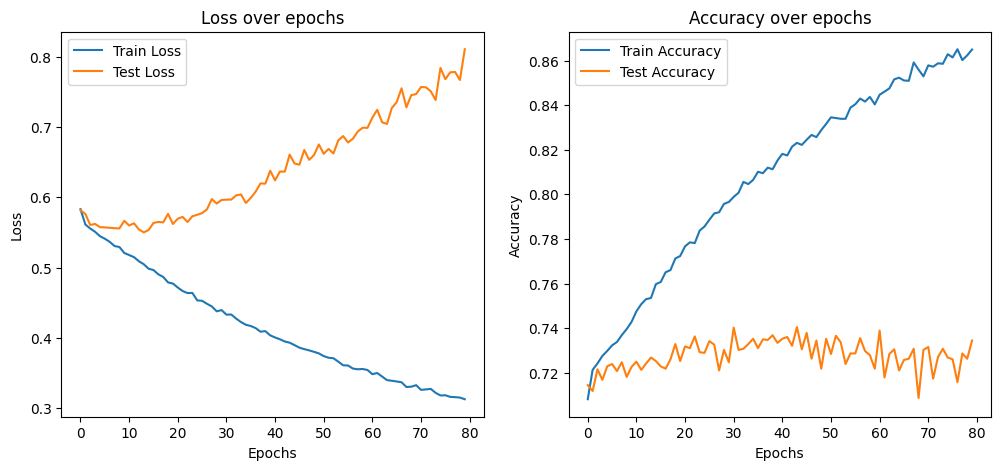

In [52]:
import matplotlib.pyplot as plt
# Plotting training and test losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and test accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# Analisis de Resultado

El modelo no pudo generalizar de buena forma los datos puede ser por la falta de columnas importantes en el dataset desharemos el PCA y solo eliminaremos las columnas que son strings de estructura

In [55]:
# Load the data
data = pd.read_csv('./Base_entrenamiento.csv')

# Checking the percentage of missing values per column
missing_values_percentage = data.isnull().mean() * 100

# Dropping rows with missing values as they represent a minor percentage (0.8% as stated in the R script)
data_cleaned = data.dropna()

# Dropear colmnas 'subsegmentoestructural','segmentoestructural'
data_cleaned = data_cleaned.drop(['subsegmentoestructural','segmentoestructural'], axis=1)

y = data_cleaned['y_auto_cura']
# Features (excluding the target variable)
X = data_cleaned.drop('y_auto_cura', axis=1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the Random Forest Classifier
rf_clf.fit(X_train, y_train)
# Predictions
rf_pred = rf_clf.predict(X_test)
# Predicted probabilities
rf_pred_prob = rf_clf.predict_proba(X_test)

# Evaluation of the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_log_loss = log_loss(y_test, rf_pred_prob)

rf_accuracy, rf_log_loss

(0.7652631578947369, 0.48580128391912386)

In [62]:

# Neural Network with PyTorch
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)  # 2 output nodes for binary classification

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    
# Prepare data for PyTorch
X_train_torch = torch.tensor(X_train.values, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.int64)
X_test_torch = torch.tensor(X_test.values, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.int64)

# Create Tensor datasets and dataloaders
train_dataset = TensorDataset(X_train_torch, y_train_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Initialize the neural network
input_size = X_train.shape[1]
net = Net(input_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Function to calculate the accuracy
def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.argmax(1)
    correct = (predicted == y_true).sum().item()
    return correct / y_true.size(0)

# Training the Neural Network
num_epochs = 80
for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    running_corrects = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # statistics
        running_loss += loss.item() * inputs.size(0)
        running_corrects += calculate_accuracy(labels, outputs) * inputs.size(0)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = running_corrects / total

    # Evaluate on the test set
    net.eval()
    with torch.no_grad():
        test_loss = 0.0
        test_corrects = 0
        for data in test_loader:
            inputs, labels = data
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            test_corrects += calculate_accuracy(labels, outputs) * inputs.size(0)
        test_loss = test_loss / len(test_loader.dataset)
        test_acc = test_corrects / len(test_loader.dataset)

    print(f'Epoch {epoch+1}/{num_epochs} : '
          f'Train Loss: {epoch_loss:.4f} | Train Accuracy: {epoch_acc:.4f} '
          f'Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}')

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)
    

# Output results for NN:
test_acc, test_loss

Epoch 1/80 : Train Loss: 30565.6626 | Train Accuracy: 0.5882 Test Loss: 6433.4405 | Test Accuracy: 0.6134
Epoch 2/80 : Train Loss: 4763.2885 | Train Accuracy: 0.5974 Test Loss: 2383.2349 | Test Accuracy: 0.6787
Epoch 3/80 : Train Loss: 1292.7513 | Train Accuracy: 0.5918 Test Loss: 1792.1072 | Test Accuracy: 0.6487
Epoch 4/80 : Train Loss: 605.7695 | Train Accuracy: 0.5932 Test Loss: 853.6701 | Test Accuracy: 0.5350
Epoch 5/80 : Train Loss: 362.1260 | Train Accuracy: 0.5866 Test Loss: 411.7072 | Test Accuracy: 0.6884
Epoch 6/80 : Train Loss: 102.9215 | Train Accuracy: 0.5853 Test Loss: 124.5838 | Test Accuracy: 0.4837
Epoch 7/80 : Train Loss: 60.0476 | Train Accuracy: 0.6232 Test Loss: 91.1967 | Test Accuracy: 0.6071
Epoch 8/80 : Train Loss: 29.4072 | Train Accuracy: 0.6558 Test Loss: 72.1333 | Test Accuracy: 0.6468
Epoch 9/80 : Train Loss: 14.8853 | Train Accuracy: 0.6639 Test Loss: 44.4990 | Test Accuracy: 0.6784
Epoch 10/80 : Train Loss: 5.6351 | Train Accuracy: 0.6765 Test Loss: 41.

(0.6973684210526315, 0.7903753401103772)

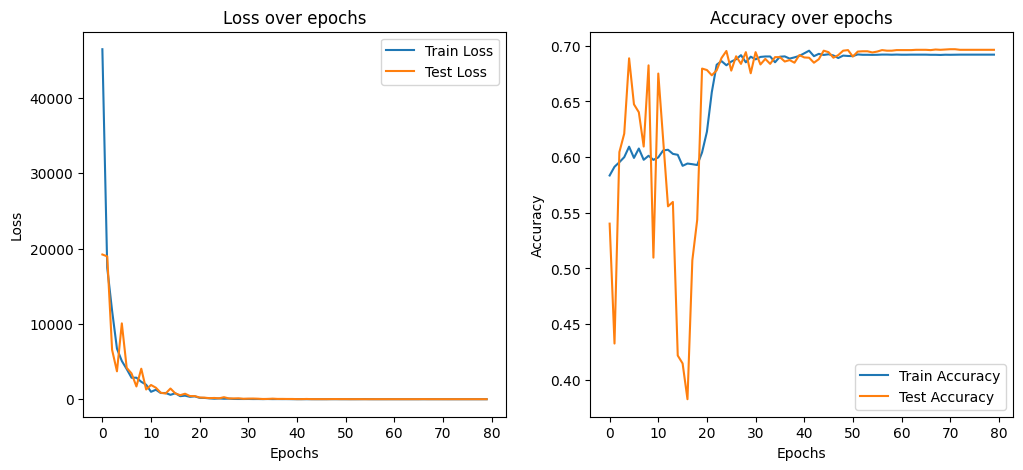

In [58]:
import matplotlib.pyplot as plt
# Plotting training and test losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and test accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


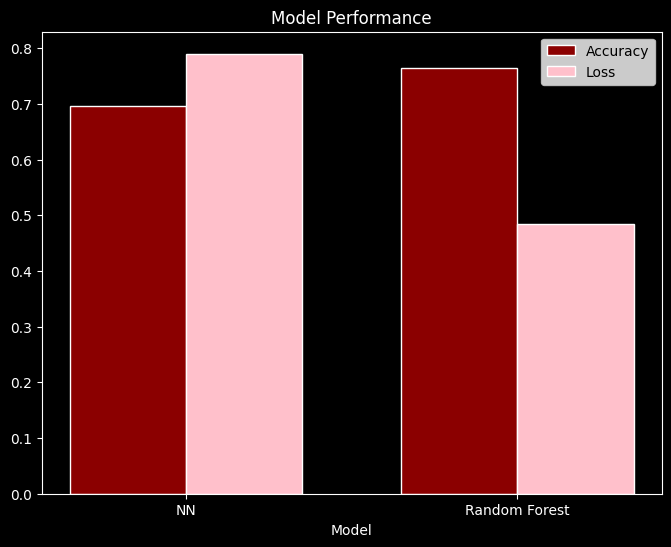

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['NN', 'Random Forest']
accuracy = [0.697, 0.765]  # ACC values in percentage
loss = [0.79, 0.485]  # Loss values

# X-axis locations for the groups
ind = np.arange(len(accuracy))  

# Plot size
plt.figure(figsize=(8, 6))

# Bar width
width = 0.35       

# Creating the bars
plt.bar(ind, accuracy, width, label='Accuracy', color='darkred', edgecolor='white')
plt.bar(ind + width, loss, width, label='Loss', color='pink', edgecolor='white')

# Adding the aesthetics
plt.xlabel('Model')
plt.title('Model Performance')
plt.xticks(ind + width / 2, models)
plt.legend()

# Set the background color
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.figure.set_facecolor('xkcd:black')

# Set the color of the axes, labels, and ticks
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')

# Save the plot with a transparent background
plt.savefig('./model_performance.png', transparent=True, dpi=300)

# Show the plot (this will not show in the actual output as the background is transparent)
plt.show()
